In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from random import randint
import pandas_profiling as pp
import os
import csv

In [2]:
os.chdir("/Users/adityaraj/Desktop/Data Mining and Machine Learning Folder/Project/Final/")

In [3]:
beijing = pd.read_csv("Beijing Housing.csv",encoding='gbk')

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
beijing.shape

(318851, 26)

In [5]:
#beijing.drop("Cid", axis = 1, inplace=True)
#beijing.drop("id", axis = 1, inplace=True)
#beijing.drop("url", axis = 1, inplace=True)

In [6]:
beijing.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [7]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [8]:
#Analyze all the attributes with pandas profiling
#beijing_analysis=pp.ProfileReport(beijing)
#beijing_analysis.to_file(r'C:\Users\Pratiksha Chate\Desktop\Books\Data_Mining\Project\ADUUUUU\Beijing_analysis.html')

In [9]:
beijing['tradeyear']=beijing.tradeTime.astype(str).str[0:4]

In [10]:
beijing=beijing.loc[beijing.livingRoom!='#NAME?',:]
beijing.livingRoom=beijing.livingRoom.astype('int64')
beijing.livingRoom.value_counts()

2    160589
1     82386
3     67611
4      6821
5      1107
6       228
7        37
0        28
8         7
9         5
Name: livingRoom, dtype: int64

In [11]:
beijing.drawingRoom=beijing.drawingRoom.astype('int64')
beijing.bathRoom=beijing.bathRoom.astype('int64')

In [12]:
beijing.floor=beijing.floor.apply(lambda beijing:beijing.split()[1])
beijing.floor=beijing.floor.astype('int64')

In [13]:
beijing.constructionTime=beijing.constructionTime.replace('未知','9999').astype('int64')
beijing=beijing.loc[(beijing.constructionTime>=1950)&(beijing.constructionTime<=2016),:]

In [14]:
beijing.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeyear
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0,2016
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0,2016
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0,2016
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0,2016
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0,2016


<AxesSubplot:xlabel='tradeyear', ylabel='price'>

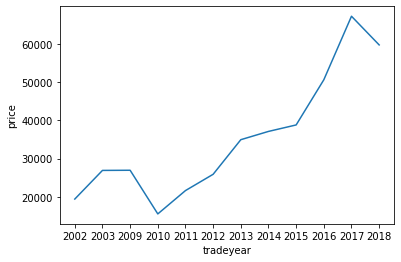

In [15]:
beijing_year = beijing.groupby(['tradeyear']).price.mean()
sns.lineplot(data=beijing_year)

In [16]:
beijing_2016=beijing.loc[beijing.tradeyear=='2016',:]

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

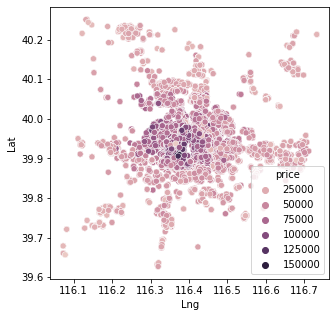

In [17]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=beijing_2016['Lng'],y=beijing_2016['Lat'],hue=beijing_2016['price'])

In [18]:
# !pip install pyecharts

In [19]:
# from pyecharts.charts import Geo
# from pyecharts import options as opts
# from pyecharts.globals import ChartType
# import json
# # with open('../input/test_data.json', 'w', encoding='utf-8') as json_file:
# #     json_file.write(json.dumps(dict))
# geo=Geo()
# geo.add_schema(maptype= "北京",label_opts=opts.LabelOpts(is_show=False),center=[116.2317, 39.5427])
# geo.add_coordinate_json(json_file='../input/locjson/test_data.json')
# geo.add('热力图',values,label_opts=opts.LabelOpts(is_show=False),is_large=True,progressive_threshold=10000)
# geo.set_global_opts(
#         visualmap_opts=opts.VisualMapOpts(is_piecewise=True,max_ = max_price,split_number=8),
#         title_opts=opts.TitleOpts(title="Geo-HeatMap"),
#     )

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='square'>

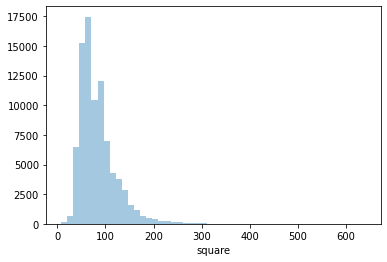

In [20]:
sns.distplot(a=beijing_2016['square'],kde=False)

<AxesSubplot:xlabel='square', ylabel='followers'>

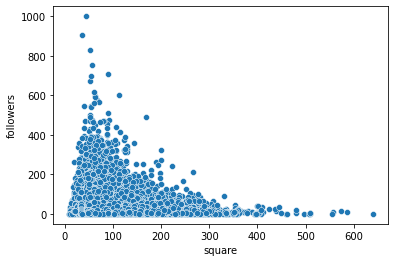

In [21]:
sns.scatterplot(x=beijing_2016['square'],y=beijing_2016['followers'])

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


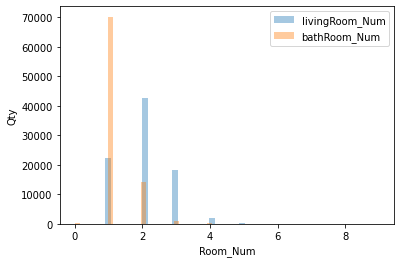

In [22]:
sns.distplot(a=beijing_2016['livingRoom'],kde=False,label='livingRoom_Num')
sns.distplot(a=beijing_2016['bathRoom'],kde=False,label='bathRoom_Num')
plt.xlabel('Room_Num')
plt.ylabel('Qty')
plt.legend()

<AxesSubplot:xlabel='livingRoom', ylabel='price'>

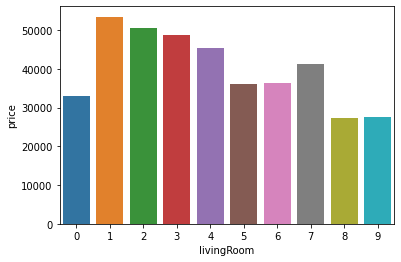

In [23]:
livingRoom_Num=beijing_2016.groupby('livingRoom').price.mean()
sns.barplot(x=livingRoom_Num.index,y=livingRoom_Num)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='constructionTime'>

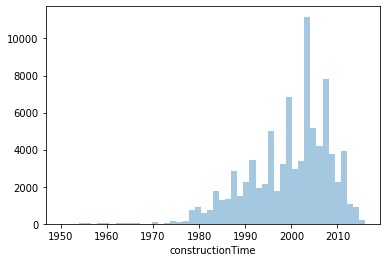

In [24]:
sns.distplot(a=beijing_2016['constructionTime'],kde=False)

<AxesSubplot:xlabel='constructionTime', ylabel='price'>

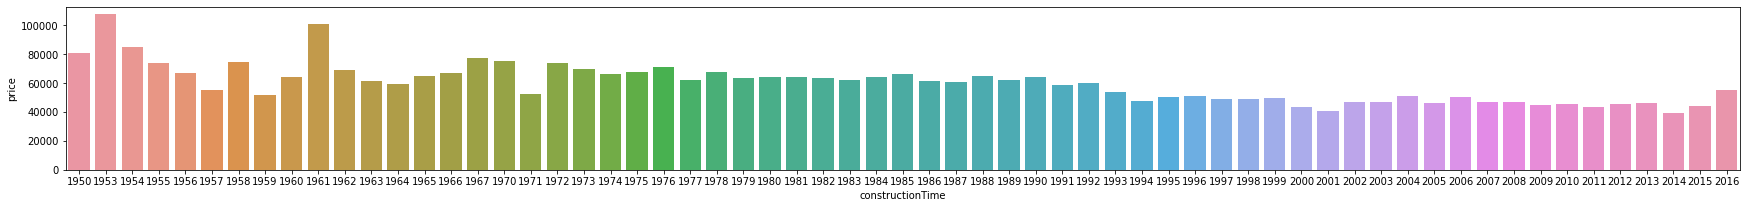

In [25]:
plt.figure(figsize=(30,3))
ConstructionTime_price=beijing_2016.groupby('constructionTime').price.mean()
sns.barplot(x=ConstructionTime_price.index,y=ConstructionTime_price)

<AxesSubplot:>

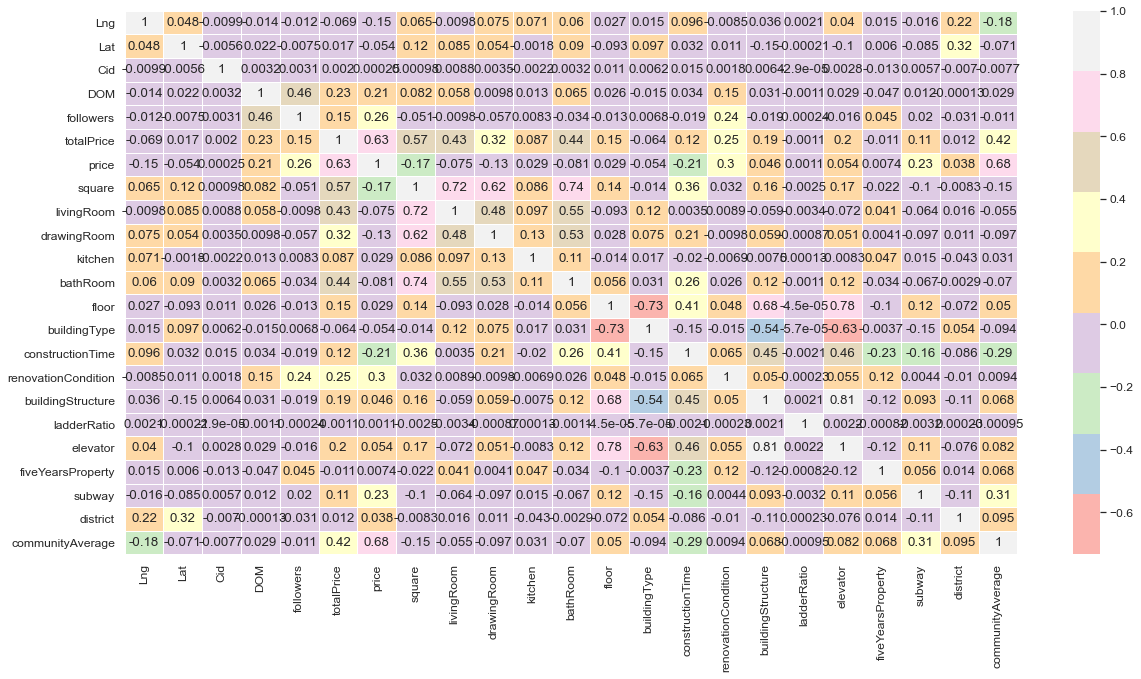

In [26]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(beijing.corr(),linewidths=0.5,annot=True,cmap='Pastel1')

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


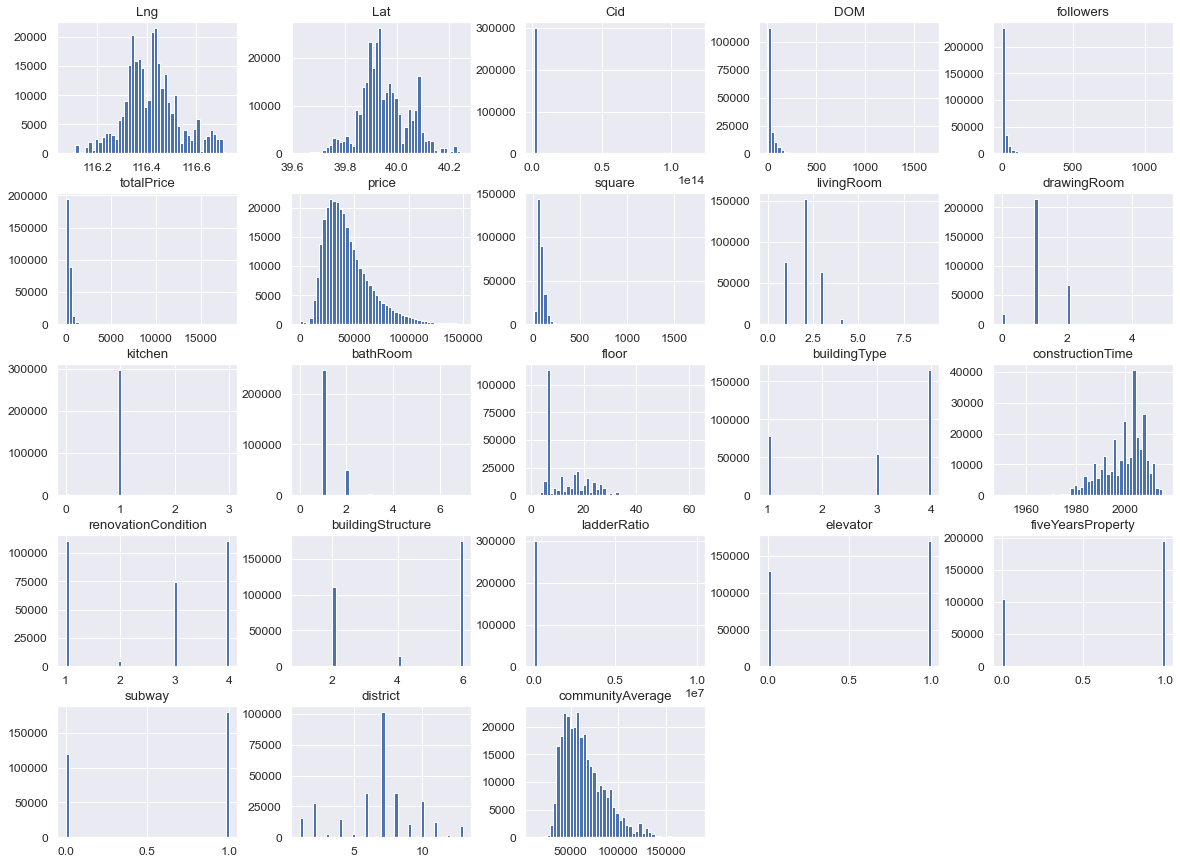

In [27]:
beijing.hist(bins=50, figsize=(20,15))
plt.show()

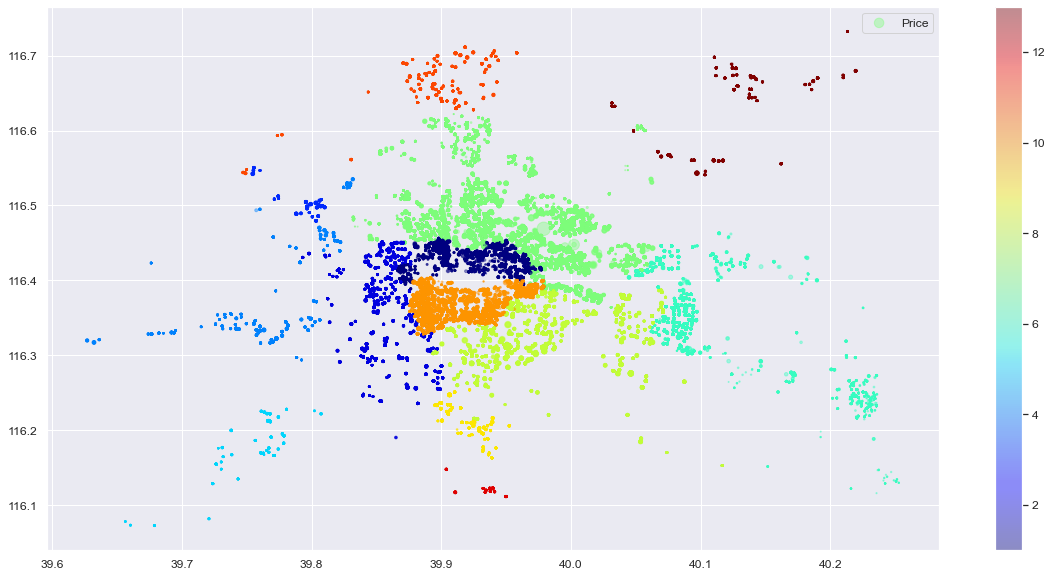

In [28]:
fig = plt.scatter(x=beijing['Lat'], y=beijing['Lng'], alpha=0.4, \
    s=beijing['totalPrice']/100, label='Price', \
    c=beijing['district'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.legend()
plt.show()

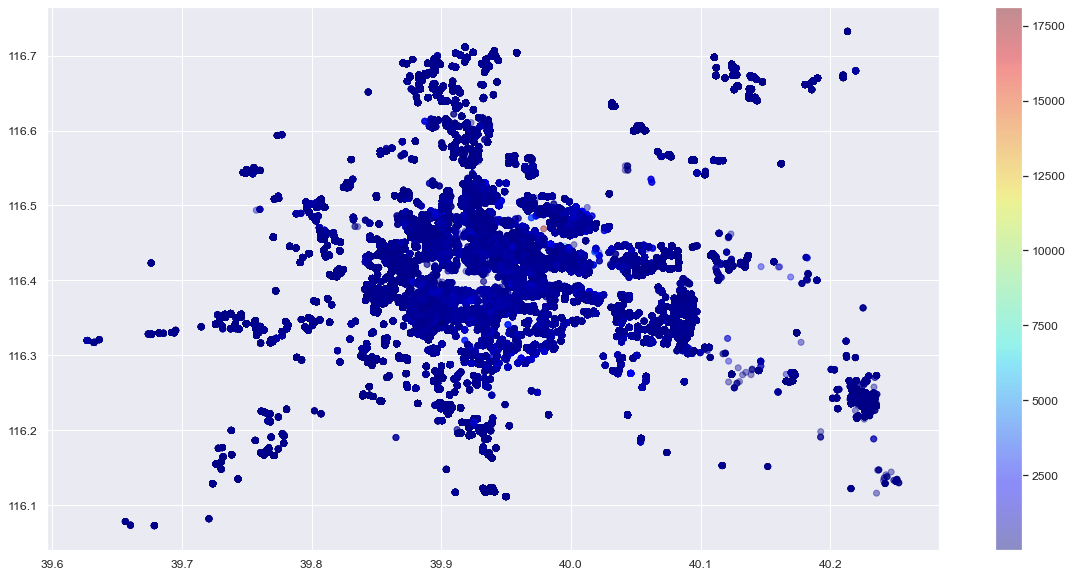

In [29]:
fig = plt.scatter(x=beijing['Lat'], y=beijing['Lng'], alpha=0.4, \
    c=beijing['totalPrice'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.show()

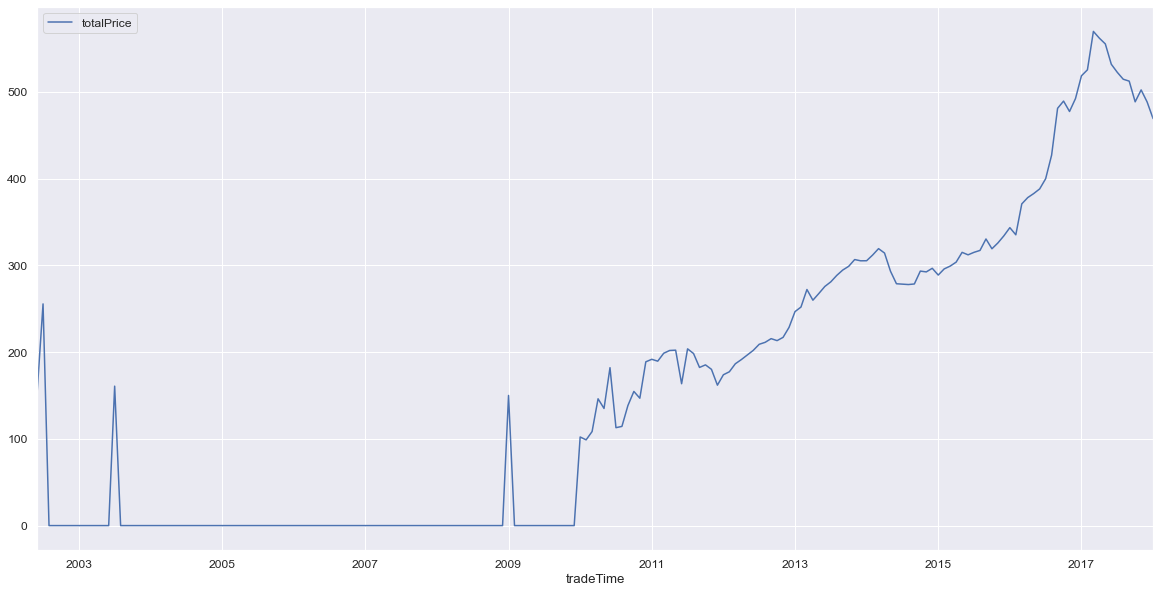

In [30]:
price_by_trade_time = pd.DataFrame()
price_by_trade_time['totalPrice'] = beijing['totalPrice']
price_by_trade_time.index = beijing['tradeTime'].astype('datetime64[ns]')
price_by_trade_month = price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
price_by_trade_month.plot(kind='line')
plt.show()

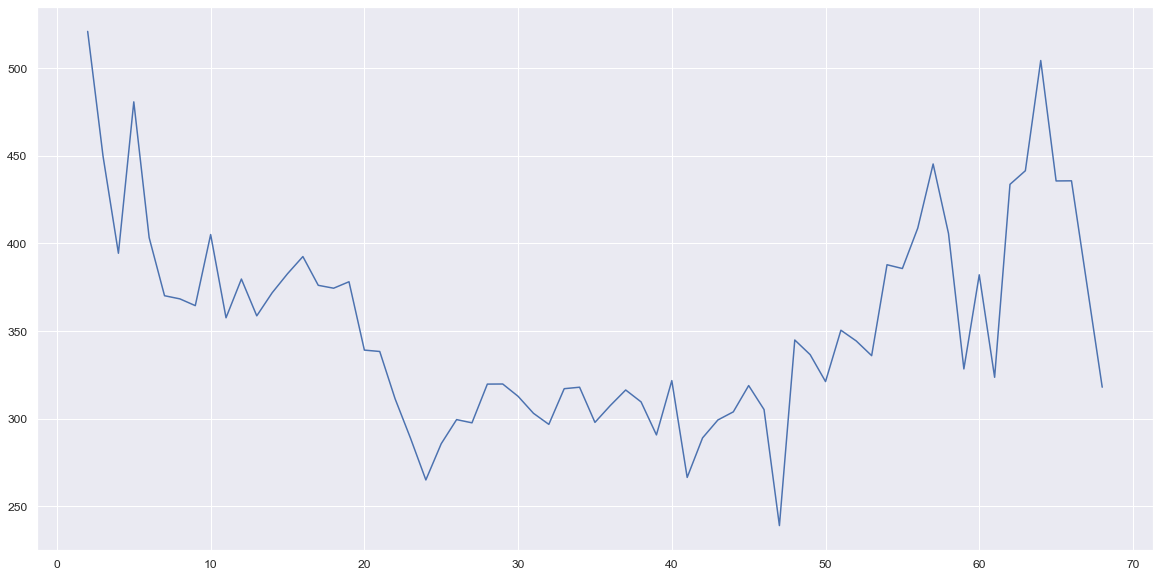

In [31]:
price_by_cons_time = pd.DataFrame()
price_by_cons_time['totalPrice'] = beijing['totalPrice']
price_by_cons_time['constructionTime'] = beijing['constructionTime']
price_by_cons_time = price_by_cons_time[
	(price_by_cons_time.constructionTime != '0')
	& (price_by_cons_time.constructionTime != '1')
	& (price_by_cons_time.constructionTime != 'Î´Öª')
]
price_by_cons_time['constructionTime'] = price_by_cons_time['constructionTime'].astype('int64')
price_by_cons_time['constructionTime'] = 2018 - price_by_cons_time['constructionTime']
price_by_cons_time_index = list(set(price_by_cons_time['constructionTime']))
price_by_cons_time_index.sort()
price_by_cons_time.index = price_by_cons_time['constructionTime']
price_by_cons_time = price_by_cons_time.drop('constructionTime', axis=1)
price_by_cons_time_line = []
price_by_cons_time_stat = []
for years in price_by_cons_time_index:
	price_by_cons_time_line.append(price_by_cons_time.loc[years]['totalPrice'].mean())
	try:
		price_by_cons_time_stat.append(price_by_cons_time.loc[years]['totalPrice'].values)
	except Exception:
		price_by_cons_time_stat.append(np.array([price_by_cons_time.loc[years]['totalPrice']]))
plt.plot(list(price_by_cons_time_index), price_by_cons_time_line)
plt.show()


In [32]:
def get_mean(price_by_square):
	try:
		price_by_square_index = list(set(price_by_square['square']))
		price_by_square_index.sort()
		price_by_square_line = []
		price_by_square.index = price_by_square['square']
		for squares in price_by_square_index:
			price_by_square_line.append(price_by_square.loc[squares]['totalPrice'].mean())
		price_by_square_index = [int(x) for x in price_by_square_index]
	except Exception:
		price_by_square_line = [price_by_square.loc['totalPrice']]
		price_by_square_index = [int(price_by_square['square'])]
	return price_by_square_line, price_by_square_index

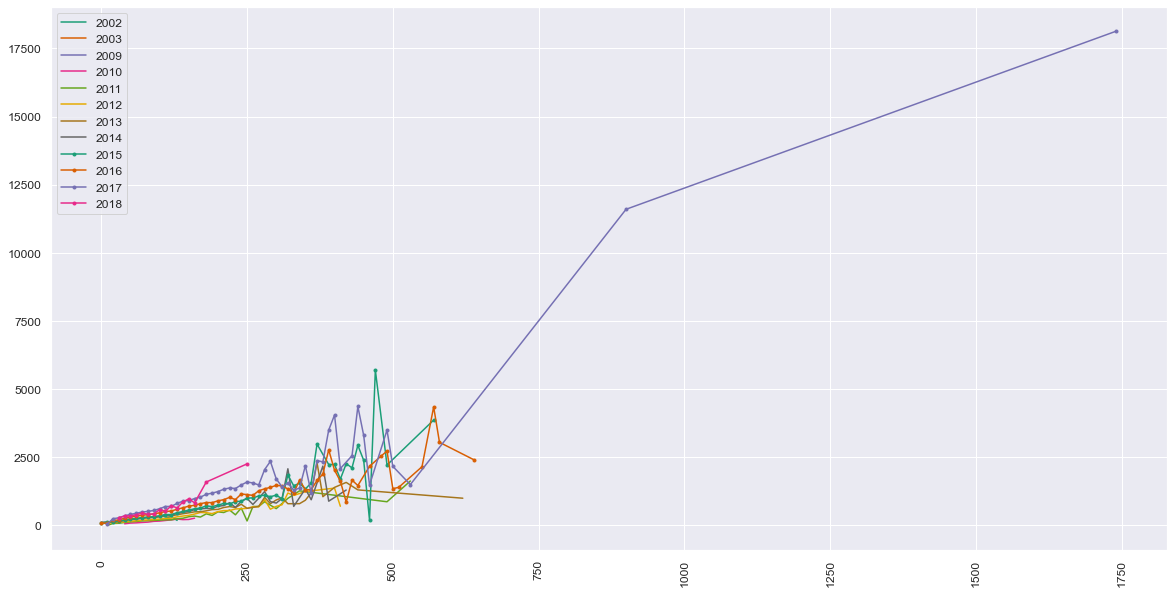

In [33]:
price = pd.DataFrame()
price['totalPrice'] = beijing['totalPrice']
price['square'] = beijing['square']
price.index = beijing['tradeTime'].astype('datetime64[ns]')
price['square'] = np.ceil(price['square'])
price['square'] = price['square'] - (price['square'] % 10)
price = price.to_period('Y')
price_time_index = [x.strftime('%Y') for x in set(price.index)]
price_time_index.sort()
colormap = plt.cm.Dark2.colors
m_styles = ['','.','o','^','*']
for year, (maker, color) in zip(price_time_index, itertools.product(m_styles, colormap)):
    y, x = get_mean(price.loc[year])
    plt.plot(x, y, color=color, marker=maker, label=year)
plt.xticks(rotation=90)
plt.legend(price_time_index)
plt.show()

In [34]:
beijing = beijing.drop(['url', 'id', 'price', 'Cid', 'DOM'], axis = 1)

In [35]:
beijing.isnull().sum().sort_values(ascending = False).head(10)

buildingType        1543
communityAverage     290
tradeyear              0
bathRoom               0
Lat                    0
tradeTime              0
followers              0
totalPrice             0
square                 0
livingRoom             0
dtype: int64

In [36]:
beijing['buildingType'].value_counts()

4.0    164919
1.0     78107
3.0     54870
2.0        90
Name: buildingType, dtype: int64

In [37]:
beijing['buildingType'] = beijing['buildingType'].map(lambda x: x if x >= 1 else np.nan)

In [38]:
beijing['buildingType'].value_counts()

4.0    164919
1.0     78107
3.0     54870
2.0        90
Name: buildingType, dtype: int64

In [39]:
beijing['floor'].head()

0    26
1    22
2     4
3    21
4     6
Name: floor, dtype: int64

In [40]:
beijing['constructionTime'].value_counts()

2004    21145
2003    19409
2005    18924
2006    14854
2007    14213
        ...  
1971        9
1961        8
1952        5
1968        4
1969        4
Name: constructionTime, Length: 66, dtype: int64

In [41]:
# Dropping Construction Time from the dataset
beijing = beijing.drop('constructionTime', axis = 1)

In [42]:
mean_communityAverage = beijing['communityAverage'].mean()
beijing['communityAverage'] = beijing['communityAverage'].fillna(mean_communityAverage)

In [43]:
beijing.isnull().sum().sum()

1543

In [44]:
y_train = beijing.pop('totalPrice')

In [45]:
str_col = ['buildingType','buildingStructure', 'renovationCondition', 'district']
beijing[str_col] = beijing[str_col].astype(str)

In [46]:
beijing['tradeTime'] = beijing['tradeTime'].map(lambda x: x.split('-')[0])

In [47]:
beijing = beijing.drop('floor',axis = 1)
beijing.head()

,Lng,Lat,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeyear
0,116.475489,40.019520,2016,106,131.00,2,1,1,1,1.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,2016
1,116.453917,39.881534,2016,126,132.38,2,2,1,2,1.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,2016
2,116.561978,39.877145,2016,48,198.00,3,2,1,3,4.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,2016
3,116.438010,40.076114,2016,138,134.00,3,1,1,1,1.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,2016
4,116.428392,39.886229,2016,286,81.00,2,1,1,1,4.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,2016


In [48]:
beijing_dummy = pd.get_dummies(beijing)

In [49]:
beijing_dummy.head()

,Lng,Lat,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,ladderRatio,elevator,...,tradeyear_2009,tradeyear_2010,tradeyear_2011,tradeyear_2012,tradeyear_2013,tradeyear_2014,tradeyear_2015,tradeyear_2016,tradeyear_2017,tradeyear_2018
0,116.475489,40.019520,106,131.00,2,1,1,1,0.217,1.0,...,0,0,0,0,0,0,0,1,0,0
1,116.453917,39.881534,126,132.38,2,2,1,2,0.667,1.0,...,0,0,0,0,0,0,0,1,0,0
2,116.561978,39.877145,48,198.00,3,2,1,3,0.500,1.0,...,0,0,0,0,0,0,0,1,0,0
3,116.438010,40.076114,138,134.00,3,1,1,1,0.273,1.0,...,0,0,0,0,0,0,0,1,0,0
4,116.428392,39.886229,286,81.00,2,1,1,1,0.333,0.0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:
X = beijing_dummy.values
y = y_train.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [52]:
RFR = RandomForestRegressor(n_estimators=200, max_features=0.3)
RFR.fit(X_train, y_train)

RandomForestRegressor(max_features=0.3, n_estimators=200)

In [53]:
y_predict = RFR.predict(X_test)

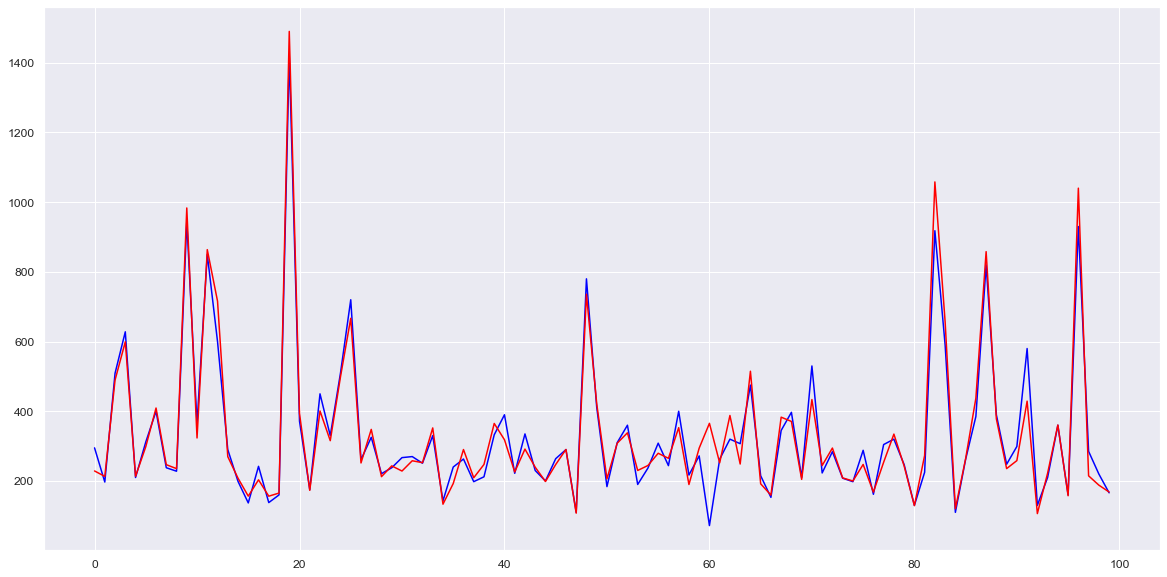

In [54]:
plt.plot(y_test[:100], color = 'blue')
plt.plot(y_predict[:100], color = 'red')

In [55]:
#Evaluating the model by calculating performance metrics
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_predict))
print(metrics.mean_squared_error(y_test,y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("Accuracy using Random Forest Regression : ",RFR.score(X_test,y_test)*100,"%")

35.195326842697035
5834.704722421625
76.38523890400307
Accuracy using Random Forest Regression :  89.62140565686353 %


In [56]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [57]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred_dt = reg.predict(X_test)

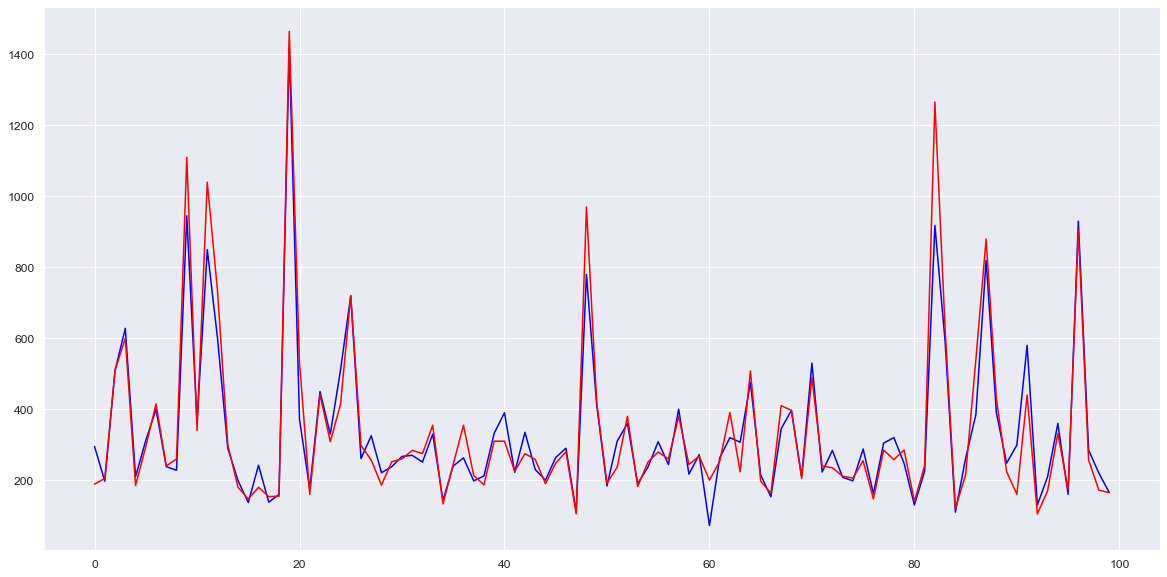

In [58]:
plt.plot(y_test[:100], color = 'blue')
plt.plot(y_pred_dt[:100], color = 'red')

In [59]:
print(metrics.mean_absolute_error(y_test,y_pred_dt))
print(metrics.mean_squared_error(y_test,y_pred_dt))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))
print("Accuracy using Decision Tree : ",reg.score(X_test,y_test)*100,"%")

48.37856732359532
7529.131210178897
86.77056649681906
Accuracy using Decision Tree :  86.60741163363222 %


In [60]:
from xgboost import XGBRegressor

In [61]:
xgb = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

[23:01:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


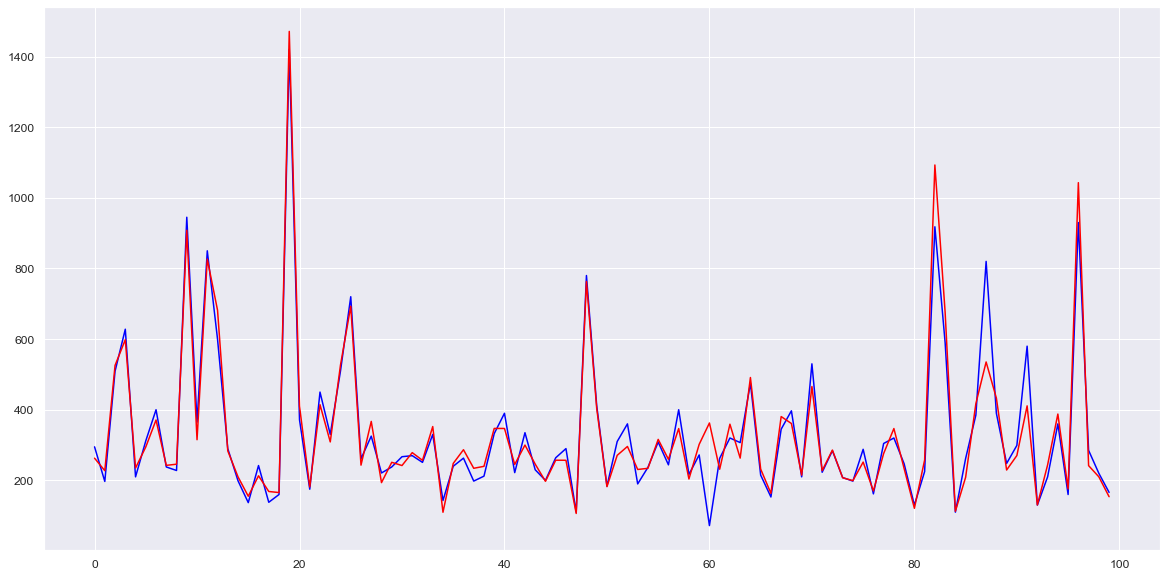

In [62]:
plt.plot(y_test[:100], color = 'blue')
plt.plot(y_pred[:100], color = 'red')

In [63]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using eXtreme Gradient Boosting : ",xb.score(X_test,y_test)*100,"%")

35.50790317702985
5303.567963151472
72.825599641551
Accuracy using eXtreme Gradient Boosting :  90.56617548283428 %


In [64]:
from sklearn.ensemble import ExtraTreesRegressor

In [65]:
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

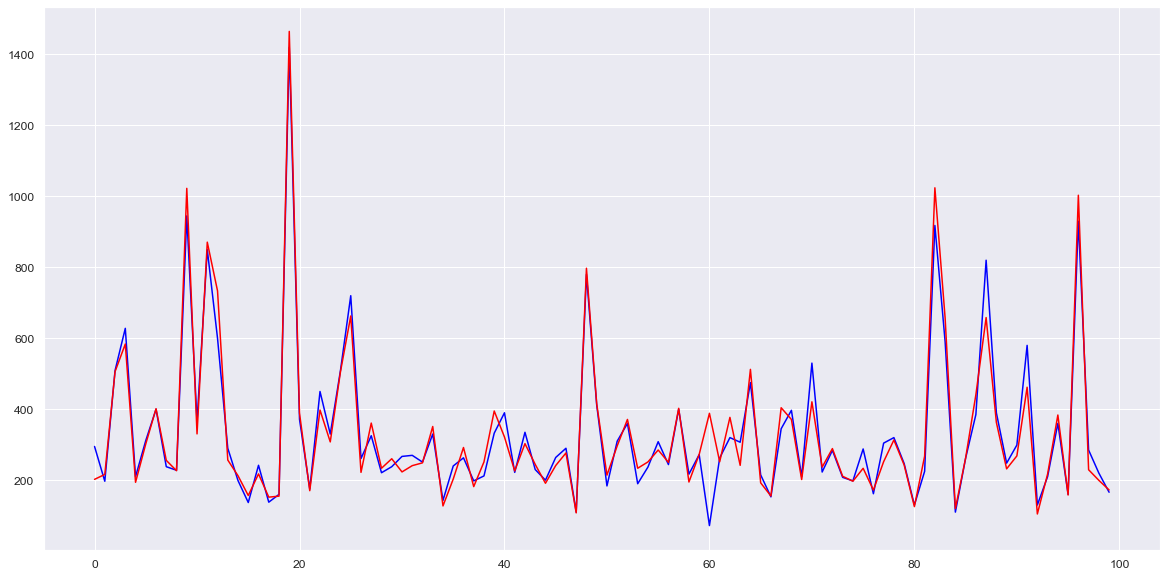

In [66]:
plt.plot(y_test[:100], color = 'blue')
plt.plot(y_pred[:100], color = 'red')

In [67]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Extra Tree Regressor : ",etr.score(X_test,y_test)*100,"%")

36.91597394368019
4784.529803201485
69.17029567091271
Accuracy using Extra Tree Regressor :  91.48942469029258 %
